In [1]:
#!/usr/bin/env python

import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import math
import pandas as pd
import wradlib
from scipy import stats
import matplotlib.cm as cm
my_cmap = cm.get_cmap('jet',40)
my_cmap.set_under('lightgrey')
my_cmap.set_over('darkred')
from pcc import get_miub_cmap as my_cmap
from pcc import plot_radar
from pcc import boxpol_pos
from pcc import plot_borders
import wradlib as wrl
from osgeo import osr
from satlib import ipoli_radi
from satlib import corcor
Pos = boxpol_pos()
blon0, blat0 = Pos['lon_ppi'], Pos['lat_ppi']
bbx, bby = Pos['gkx_ppi'], Pos['gky_ppi']
from time import *

% matplotlib inline

print ("_")

_


/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/ipykernel/pylab/config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/ipykernel/pylab/config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/ipykernel/pylab/config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  use `figure_formats` instead)""")
/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/ipykernel/pylab/config.py:95: DeprecationW

In [55]:
import os
all_dpr, all_box, all_rad = np.array([]), np.array([]), np.array([])
dpr_pha, dpr_typ = np.array([]), np.array([])
dpr_lon, dpr_lat = np.array([]), np.array([])
raw_dpr, raw_box = np.array([]), np.array([])


#path = '/automount/ags/velibor/data/dpr_boxpol/'
path = '/automount/ags/velibor/data/dpr_boxpol_radolan/test/inner-ausser-ring/'

c_liste = sorted(glob.glob(path+'/*.npy'))


for iii in range(len(c_liste)-1):
    
    a = np.load(c_liste[iii])[0]
    b = np.load(c_liste[iii])[2]
    c = np.load(c_liste[iii])[4]
    e = np.load(c_liste[iii])[5]
    f = np.load(c_liste[iii])[6]
    x = np.load(c_liste[iii])[7]
    y = np.load(c_liste[iii])[8]
    
    
    a = a.reshape(a.shape[0]*a.shape[1])
    b = b.reshape(b.shape[0]*b.shape[1])
    c = c.reshape(c.shape[0]*c.shape[1])
    e = e.reshape(e.shape[0]*e.shape[1])
    f = f.reshape(f.shape[0]*f.shape[1])
    x = x.reshape(x.shape[0]*x.shape[1])
    y = y.reshape(y.shape[0]*y.shape[1])
    
    print a.shape,b.shape,c.shape, e.shape, f.shape
    
    all_dpr = np.append(all_dpr,a)
    all_box = np.append(all_box,b)
    all_rad = np.append(all_rad,c)
    dpr_pha = np.append(dpr_pha,e)
    dpr_typ = np.append(dpr_typ,f)
    dpr_lon = np.append(dpr_lon,x)
    dpr_lat = np.append(dpr_lat,y)
    
# 2= liquid, 0=solid, 1=mixed
dpr_pha = dpr_pha.astype(int)/100  
dpr_typ = dpr_typ/10000000  

print all_dpr.shape, all_box.shape, all_rad.shape, dpr_pha.shape, dpr_typ.shape


(16219,) (16219,) (16219,) (16219,) (16219,)
(10927,) (10927,) (10927,) (10927,) (10927,)
(15680,) (15680,) (15680,) (15680,) (15680,)
(11074,) (11074,) (11074,) (11074,) (11074,)
(15876,) (15876,) (15876,) (15876,) (15876,)
(13377,) (13377,) (13377,) (13377,) (13377,)
(13083,) (13083,) (13083,) (13083,) (13083,)
(14651,) (14651,) (14651,) (14651,) (14651,)
(15239,) (15239,) (15239,) (15239,) (15239,)
(15239,) (15239,) (15239,) (15239,) (15239,)
(15337,) (15337,) (15337,) (15337,) (15337,)
(14798,) (14798,) (14798,) (14798,) (14798,)
(14406,) (14406,) (14406,) (14406,) (14406,)
(16268,) (16268,) (16268,) (16268,) (16268,)
(15141,) (15141,) (15141,) (15141,) (15141,)
(217315,) (217315,) (217315,) (217315,) (217315,)


In [56]:
# How to separate type, phae etc 
#################################### Startiform
"""
all_dpr = all_dpr[(dpr_typ>=1.) & (dpr_typ<2.)]
all_box = all_box[(dpr_typ>=1.) & (dpr_typ<2.)]
all_rad = all_rad[(dpr_typ>=1.) & (dpr_typ<2.)]
"""
##################################### Convectiv
"""
all_dpr = all_dpr[(dpr_typ>=2.) & (dpr_typ<3.)]
all_box = all_box[(dpr_typ>=2.) & (dpr_typ<3.)]
all_rad = all_rad[(dpr_typ>=2.) & (dpr_typ<3.)]
"""

## 2= liquid, 0=solid, 1=mixed
"""
all_dpr = all_dpr[dpr_pha==2]
all_box = all_box[dpr_pha==2]
all_rad = all_rad[dpr_pha==2]
"""


'\nall_dpr = all_dpr[dpr_pha==2]\nall_box = all_box[dpr_pha==2]\nall_rad = all_rad[dpr_pha==2]\n'

In [57]:
def plot_vergleich(all_dpr, all_box, all_rad):
    
    from pcc import get_my_cmap2

    #m1 = ~np.isnan(all_dpr) & ~np.isnan(all_box) 
    #m2 = ~np.isnan(all_dpr) & ~np.isnan(all_rad) 
    m3 = ~np.isnan(all_dpr) & ~np.isnan(all_box) & ~np.isnan(all_rad)

    ff, ff2 = 15,20
    bb=50
    fig =plt.figure(figsize=(18,8))
    ax2 = fig.add_subplot(121, aspect='equal')
    plt.hist2d(all_dpr[m3],all_box[m3], bins=bb, cmap=get_my_cmap2(),vmin=0.1)

    cbar = plt.colorbar(shrink=0.7)
    cbar.set_label('number of samples', fontsize=ff2)
    cbar.ax.tick_params(labelsize=ff)

    #plt.title('Liquid Phase Corr: ' + str(round(z_corr,3)) + r'$\pm$'+  str(round(z_eror,3)), fontsize=ff2)
    plt.xlim(15,70)
    plt.ylim(15,70)
    cx,cy = np.arange(0,80,1),np.arange(0,80,1)
    plt.plot(cx,cy, color='black')
    plt.xlabel('DPR Reflectivity in dBZ',fontsize=ff2)
    plt.ylabel('BoXPol Reflectivity in dBZ',fontsize=ff2)
    plt.title(corcor(all_dpr,all_box))

    plt.grid()
    plt.xticks(fontsize=ff)
    plt.yticks(fontsize=ff)


    x3 = fig.add_subplot(122, aspect='equal')
    plt.hist2d(all_dpr[m3],all_rad[m3], bins=bb, cmap=get_my_cmap2(),vmin=0.1)

    cbar = plt.colorbar(shrink=0.7)
    cbar.set_label('number of samples', fontsize=ff2)
    cbar.ax.tick_params(labelsize=ff)

    #plt.title('Liquid Phase Corr: ' + str(round(z_corr,3)) + r'$\pm$'+  str(round(z_eror,3)), fontsize=ff2)
    plt.xlim(15,70)
    plt.ylim(15,70)
    cx,cy = np.arange(0,80,1),np.arange(0,80,1)
    plt.plot(cx,cy, color='black')
    plt.xlabel('DPR Reflectivity in dBZ',fontsize=ff2)
    plt.ylabel('Radolan Reflectivity in dBZ',fontsize=ff2)
    plt.title(corcor(all_dpr,all_rad))

    plt.grid()
    plt.xticks(fontsize=ff)
    plt.yticks(fontsize=ff)
    #plt.savefig('/automount/ags/velibor/plot/IRS/NSliquidWS_Ref.png')
    #plt.close()
    plt.tight_layout()
    plt.show()
    
    print ('Streuung DPR-BoxPol: ',np.std(all_dpr[m3]-all_box[m3]))
    print ('Streuung DPR-Radolan: ',np.std(all_dpr[m3]-all_rad[m3]))


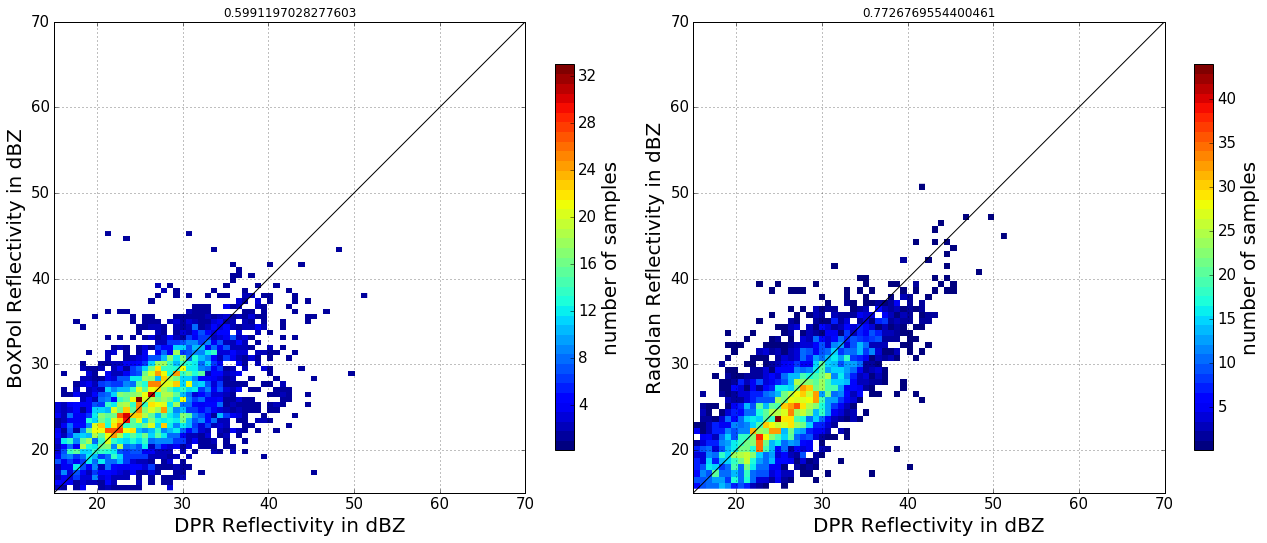

('Streuung DPR-BoxPol: ', 4.454413733916558)
('Streuung DPR-Radolan: ', 3.4688654496875055)


In [58]:
plot_vergleich(all_dpr, all_box, all_rad)

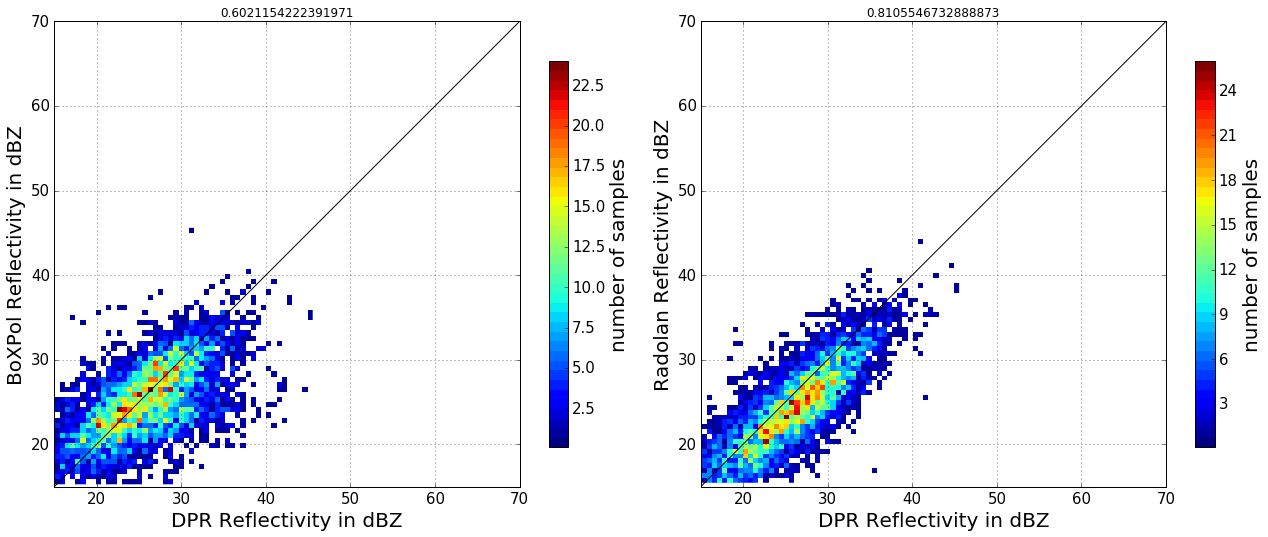

('Streuung DPR-BoxPol: ', 4.25519314084437)
('Streuung DPR-Radolan: ', 3.129721562499634)


In [59]:
####################### Startiform und Liquid
dpr_sl = all_dpr.copy()
box_sl = all_box.copy()
rad_sl = all_rad.copy()
pha_sl = dpr_pha.copy()

# Startiform
dpr_sl = dpr_sl[(dpr_typ>=1.) & (dpr_typ<2.)]
box_sl = box_sl[(dpr_typ>=1.) & (dpr_typ<2.)]
rad_sl = rad_sl[(dpr_typ>=1.) & (dpr_typ<2.)]
pha_sl = pha_sl[(dpr_typ>=1.) & (dpr_typ<2.)]

# Liquid
dpr_sl = dpr_sl[pha_sl==2]
box_sl = box_sl[pha_sl==2]
rad_sl = rad_sl[pha_sl==2]



plot_vergleich(dpr_sl, box_sl, rad_sl)


nan

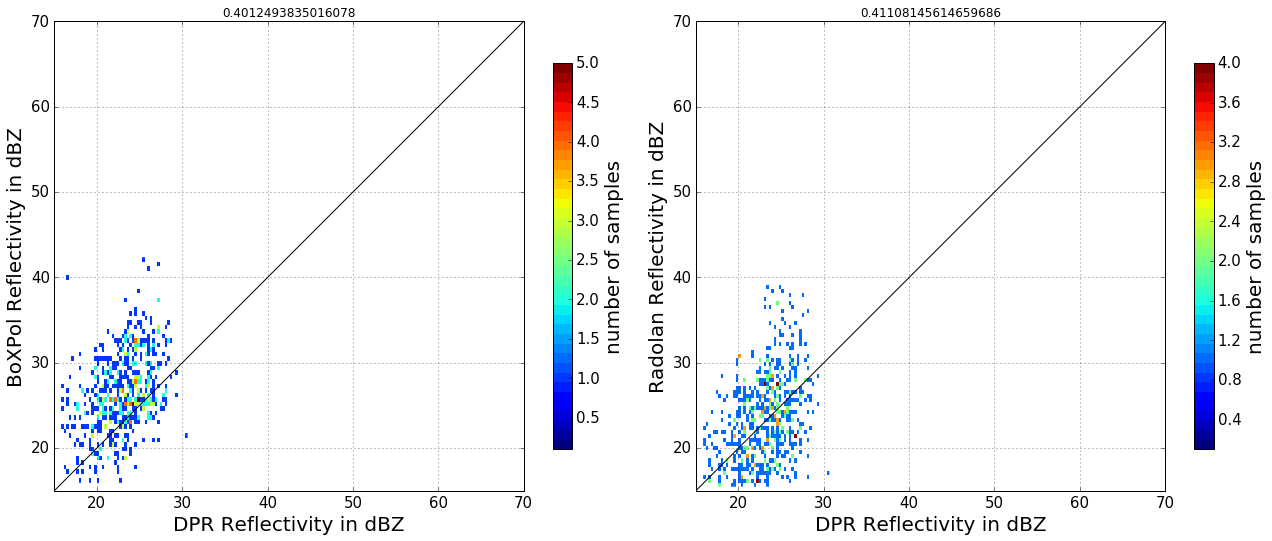

In [7]:
####################### Startiform und Solid
dpr_ss = all_dpr.copy()
box_ss = all_box.copy()
rad_ss = all_rad.copy()
pha_ss = dpr_pha.copy()

# Startiform
dpr_ss = dpr_ss[(dpr_typ>=1.) & (dpr_typ<2.)]
box_ss = box_ss[(dpr_typ>=1.) & (dpr_typ<2.)]
rad_ss = rad_ss[(dpr_typ>=1.) & (dpr_typ<2.)]
pha_ss = pha_ss[(dpr_typ>=1.) & (dpr_typ<2.)]

# Solid
dpr_ss = dpr_ss[pha_ss==0]
box_ss = box_ss[pha_ss==0]
rad_ss = rad_ss[pha_ss==0]


plot_vergleich(dpr_ss, box_ss, rad_ss)

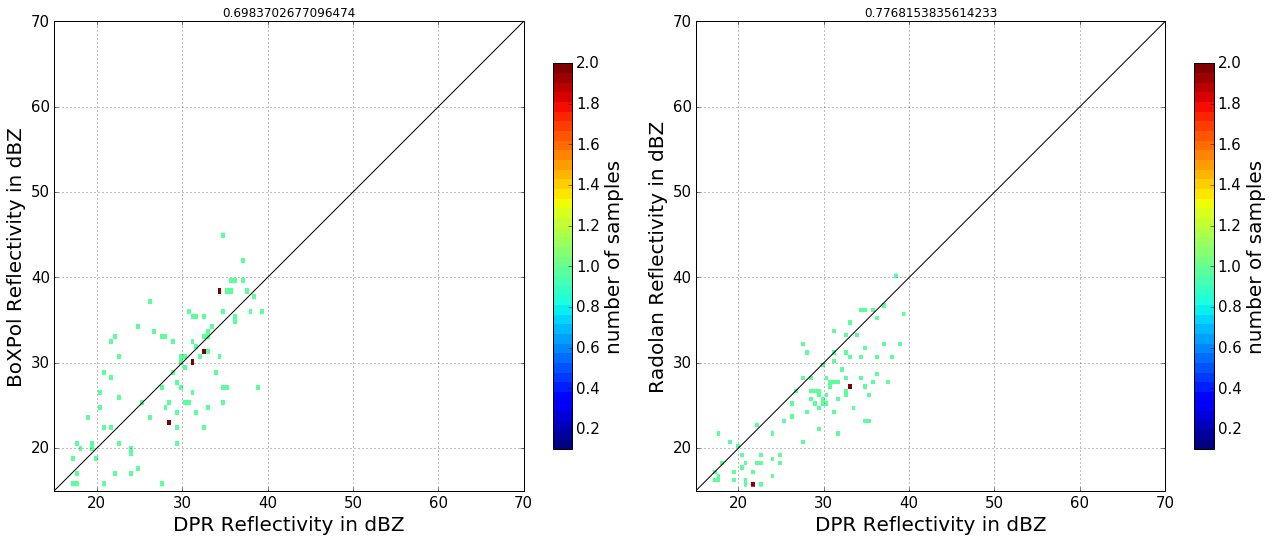

In [8]:
####################### Convective and Liquid
dpr_cl = all_dpr.copy()
box_cl = all_box.copy()
rad_cl = all_rad.copy()
pha_cl = dpr_pha.copy()

# Convectiv
dpr_cl = dpr_cl[(dpr_typ>=2.) & (dpr_typ<3.)]
box_cl = box_cl[(dpr_typ>=2.) & (dpr_typ<3.)]
rad_cl = rad_cl[(dpr_typ>=2.) & (dpr_typ<3.)]
pha_cl = pha_cl[(dpr_typ>=2.) & (dpr_typ<3.)]

# Liquid
dpr_cl = dpr_cl[pha_cl==2]
box_cl = box_cl[pha_cl==2]
rad_cl = rad_cl[pha_cl==2]


plot_vergleich(dpr_cl, box_cl, rad_cl)

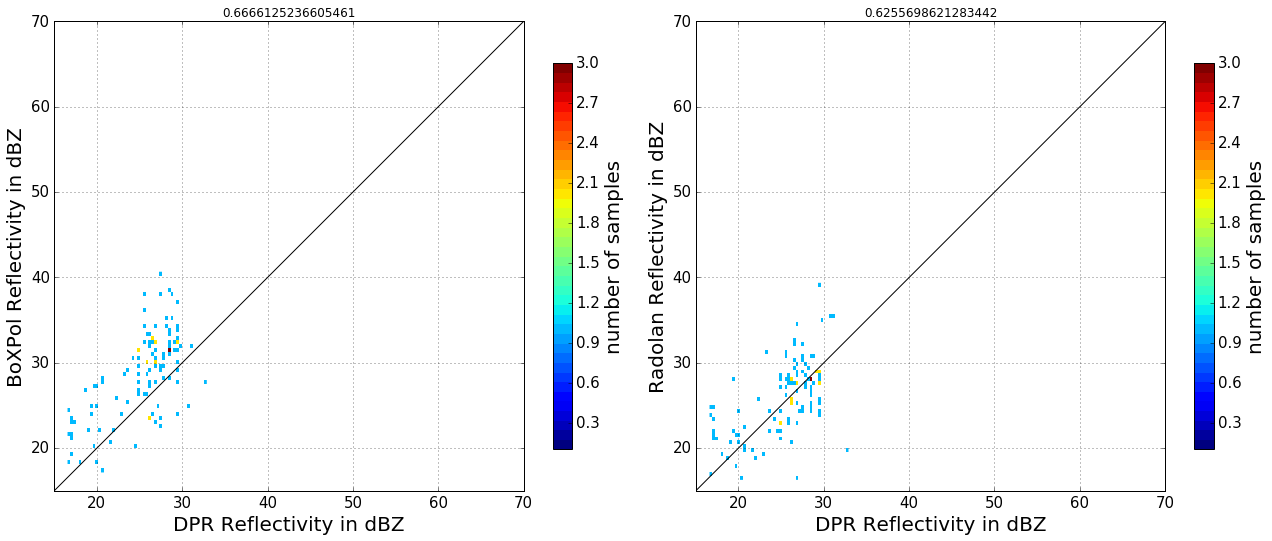

In [9]:
####################### Convective and Solid
dpr_cs = all_dpr.copy()
box_cs = all_box.copy()
rad_cs = all_rad.copy()
pha_cs = dpr_pha.copy()

# Convectiv
dpr_cs = dpr_cs[(dpr_typ>=2.) & (dpr_typ<3.)]
box_cs = box_cs[(dpr_typ>=2.) & (dpr_typ<3.)]
rad_cs = rad_cs[(dpr_typ>=2.) & (dpr_typ<3.)]
pha_cs = pha_cs[(dpr_typ>=2.) & (dpr_typ<3.)]

# Solid
dpr_cs = dpr_cs[pha_cs==0]
box_cs = box_cs[pha_cs==0]
rad_cs = rad_cs[pha_cs==0]


plot_vergleich(dpr_cs, box_cs, rad_cs)

In [ ]:
dpr_lon, dpr_lat

In [ ]:
from pcc import boxpol_pos

Pos = boxpol_pos()
blon0, blat0 = Pos['lon_ppi'], Pos['lat_ppi']
bbx, bby = Pos['gkx_ppi'], Pos['gky_ppi']
print (bbx,bby)

In [ ]:
x1, x2 = bbx, dpr_lon
y1, y2 = bby, dpr_lat

dist2 = np.hypot(x2 - x1, y2 - y1)

In [ ]:
dist2.shape, all_box.shape

In [ ]:
l1, l2 = 15, 50
pos = [dist2>50]
a,b,c =all_box[pos], all_dpr[pos], dist2[pos]
print a.shape
plt.figure(figsize=(15,10))
plt.scatter(a,b,c=c, s=50, alpha=0.9,vmin=0, vmax=50)
plt.xlim(l1,l2)
plt.ylim(l1,l2)
plt.plot([l1,l2],[l1,l2])
plt.colorbar()
plt.grid()

In [ ]:
####################### Startiform und Liquid
dpr_sl = all_dpr.copy()
box_sl = all_box.copy()
rad_sl = all_rad.copy()
pha_sl = dpr_pha.copy()
dis_sl = dist2.copy()

# Startiform
dpr_sl = dpr_sl[(dpr_typ>=1.) & (dpr_typ<2.)]
box_sl = box_sl[(dpr_typ>=1.) & (dpr_typ<2.)]
rad_sl = rad_sl[(dpr_typ>=1.) & (dpr_typ<2.)]
pha_sl = pha_sl[(dpr_typ>=1.) & (dpr_typ<2.)]
dis_sl = dis_sl[(dpr_typ>=1.) & (dpr_typ<2.)]

# Liquid
dpr_sl = dpr_sl[pha_sl==2]
box_sl = box_sl[pha_sl==2]
rad_sl = rad_sl[pha_sl==2]
dis_sl = dis_sl[pha_sl==2]






In [ ]:
l1, l2 = 15, 50
ff = 20 
plt.figure(figsize=(15,10))
plt.scatter(box_sl, dpr_sl, c=dis_sl, s=50, alpha=0.9,vmin=0, vmax=50)
plt.xlim(l1,l2)
plt.ylim(l1,l2)
plt.plot([l1,l2],[l1,l2])
plt.grid()
plt.xlabel('Z Boxpol - Z DPR in dbz', fontsize= ff)
plt.ylabel('Distance from GR', fontsize= ff)
plt.xticks(fontsize= ff);plt.yticks(fontsize= ff)
cbar = plt.colorbar(shrink=0.7)
cbar.set_label('number of samples', fontsize=ff)
cbar.ax.tick_params(labelsize=ff)

In [ ]:
diffi = all_box-all_dpr
plt.figure(figsize=(15,10))
mm = ~np.isnan(diffi) & ~np.isnan(dist2)
plt.hist2d(diffi[mm],dist2[mm], bins=50)
plt.xlim(-20,20)
plt.axvline(0, lw=3, color='black', linestyle='--')
plt.grid()
plt.xlabel('Z Boxpol - Z DPR in dbz')
plt.ylabel('Distance from GR')
plt.colorbar()


In [ ]:
ff=20
diffi = all_box-all_dpr
diffi2 = all_rad-all_dpr
plt.figure(figsize=(15,10))
mm = ~np.isnan(diffi) & ~np.isnan(dist2)& ~np.isnan(diffi2)
plt.scatter(diffi[mm],dist2[mm], c=diffi2[mm],s=50,alpha=0.6, vmin=-10, vmax=10)
plt.xlim(-20,20)
plt.axvline(0, lw=3, color='black', linestyle='--')
plt.grid()
plt.xlabel('Z Boxpol - Z DPR in dbz', fontsize= ff)
plt.ylabel('Distance from GR', fontsize= ff)
plt.xticks(fontsize= ff);plt.yticks(fontsize= ff)
plt.colorbar()

In [ ]:
####################### Startiform und Liquid
dpr_sl = all_dpr.copy()
box_sl = all_box.copy()
rad_sl = all_rad.copy()
pha_sl = dpr_pha.copy()
dis_sl = dist2.copy()

# Startiform
dpr_sl = dpr_sl[(dpr_typ>=1.) & (dpr_typ<2.)]
box_sl = box_sl[(dpr_typ>=1.) & (dpr_typ<2.)]
rad_sl = rad_sl[(dpr_typ>=1.) & (dpr_typ<2.)]
pha_sl = pha_sl[(dpr_typ>=1.) & (dpr_typ<2.)]
dis_sl = dis_sl[(dpr_typ>=1.) & (dpr_typ<2.)]

# Liquid
dpr_sl = dpr_sl[pha_sl==2]
box_sl = box_sl[pha_sl==2]
rad_sl = rad_sl[pha_sl==2]
dis_sl = dis_sl[pha_sl==2]

ff=20
diffi = dpr_sl-box_sl
diffi2 = dpr_sl-rad_sl

plt.figure(figsize=(15,10))
mm = ~np.isnan(diffi) & ~np.isnan(dis_sl)& ~np.isnan(diffi2)
plt.scatter(diffi[mm],diffi2[mm], c=dis_sl[mm],s=50,alpha=0.6, vmin=0, vmax=65)
plt.xlim(-20,20)
plt.axvline(0, lw=3, color='black', linestyle='--')
plt.axhline(0, lw=3, color='black', linestyle='--')

plt.grid()
plt.xlabel('DPR lower----- [DPR-BoXPol] -----BoXPol lower', fontsize= ff)
plt.ylabel('DPR lower----- [DPR-RADOLAN] ------RADOLAN lower', fontsize= ff)
plt.xticks(fontsize= ff);plt.yticks(fontsize= ff)
cbar = plt.colorbar(shrink=0.7)
cbar.set_label('Distance from BoXPol in km', fontsize=ff)
cbar.ax.tick_params(labelsize=ff)

In [ ]:
####################### Startiform und Liquid
dpr_sl = all_dpr.copy()
box_sl = all_box.copy()
rad_sl = all_rad.copy()
pha_sl = dpr_pha.copy()
dis_sl = dist2.copy()

# Startiform
dpr_sl = dpr_sl[(dpr_typ>=1.) & (dpr_typ<2.)]
box_sl = box_sl[(dpr_typ>=1.) & (dpr_typ<2.)]
rad_sl = rad_sl[(dpr_typ>=1.) & (dpr_typ<2.)]
pha_sl = pha_sl[(dpr_typ>=1.) & (dpr_typ<2.)]
dis_sl = dis_sl[(dpr_typ>=1.) & (dpr_typ<2.)]

# Liquid
dpr_sl = dpr_sl[pha_sl==2]
box_sl = box_sl[pha_sl==2]
rad_sl = rad_sl[pha_sl==2]
dis_sl = dis_sl[pha_sl==2]



l1, l2 = 15, 50
a,b,c =box_sl, dpr_sl, dis_sl
print a.shape
plt.figure(figsize=(15,10))

#plt.scatter(a,b, c=(a-b),s=c, alpha=0.8, vmin=-10, vmax=10)
plt.scatter(a,b, c=c,s=40, alpha=0.8, vmin=0, vmax=65)

plt.xlim(l1,l2)
plt.ylim(l1,l2)
plt.plot([l1,l2],[l1,l2])
cbar = plt.colorbar(shrink=0.7)
cbar.set_label('Distance from BoXPol in km', fontsize=ff)
cbar.ax.tick_params(labelsize=ff)
plt.grid()
plt.xlabel('Z Boxpol in dbz',fontsize=ff)
plt.ylabel('Z DPR in dbz',fontsize=ff)

In [ ]:
####################### Startiform und Liquid
dpr_sl = all_dpr.copy()
box_sl = all_box.copy()
rad_sl = all_rad.copy()
pha_sl = dpr_pha.copy()
dis_sl = dist2.copy()

# Startiform
dpr_sl = dpr_sl[(dpr_typ>=1.) & (dpr_typ<2.)]
box_sl = box_sl[(dpr_typ>=1.) & (dpr_typ<2.)]
rad_sl = rad_sl[(dpr_typ>=1.) & (dpr_typ<2.)]
pha_sl = pha_sl[(dpr_typ>=1.) & (dpr_typ<2.)]
dis_sl = dis_sl[(dpr_typ>=1.) & (dpr_typ<2.)]

# Liquid
dpr_sl = dpr_sl[pha_sl==2]
box_sl = box_sl[pha_sl==2]
rad_sl = rad_sl[pha_sl==2]
dis_sl = dis_sl[pha_sl==2]



l1, l2 = 15, 50
a,b,c =box_sl, dpr_sl, dis_sl
print a.shape
plt.figure(figsize=(15,10))

#plt.scatter(a,b, c=(a-b),s=c, alpha=0.8, vmin=-10, vmax=10)
plt.scatter(a,b, c=c,s=10*abs(dpr_sl-rad_sl), alpha=0.8, vmin=0, vmax=65)

plt.xlim(l1,l2)
plt.ylim(l1,l2)
plt.plot([l1,l2],[l1,l2])
cbar = plt.colorbar(shrink=0.7)
cbar.set_label('Distance from BoXPol in km', fontsize=ff)
cbar.ax.tick_params(labelsize=ff)
plt.grid()
plt.xlabel('Z Boxpol in dbz',fontsize=ff)
plt.ylabel('Z DPR in dbz',fontsize=ff)